In [1]:
%pip install numpy
%pip install pandas
%pip install scipy
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install tensorflow
%pip install keras
%pip install biosppy
%pip install peakutils
%pip install --upgrade setuptools pip

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib as plt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import os
import math
from math import *
import sys
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from biosppy.signals import ecg

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.decomposition import PCA

import tensorflow

import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.layers import concatenate
from keras.utils import to_categorical


from keras.optimizers import SGD, Adam
from keras.models import load_model

In [3]:
# Set filepath
filepath = 'PTB_processed'
completed = 0
total = len(os.listdir(filepath))
# Load label file
labels_file = pd.read_csv("labels.csv", header = 0)
labels = np.asarray(labels_file['diagonsis'])
# Create empty containers
signal_array = [] # To store all segments
label_array = [] # TO store all labels
# Create counters
no_segment = 0
files_completed = 0
file_number = 0
# Signal Extractor
start_time = time.time()
for filename in os.listdir(filepath):
    start_time_file = time.time()
    data = pd.read_csv(filepath + '/' + filename, header = 0, engine = 'python')
    file_label = labels[file_number]
    df = np.array(data['v4'])
    peaks = ecg.christov_segmenter(df, 1000)[0]
    for peak in range (1, len(peaks) - 1):
        segment_array = [] # To store 1 segment
        for column in data:
            df = np.array(data[column])
            segment = df[peaks[peak]-50:peaks[peak]+100]
            segment_array.append(segment)
        signal_array.append(segment_array)
        label_array.append(file_label)
        no_segment += 1
    files_completed += 1
    file_number += 1
    progress = files_completed / total * 100
    progress = round(progress, 2)
    end_time_file = time.time()
    elasped_time_file = round(end_time_file - start_time_file, 2)
    sys.stdout.write('\r'+filename + ' loaded - ' + str(progress) + '% completed' + ' - Took: ' + str(elasped_time_file) + ' seconds')


signal_array = np.asarray(signal_array).reshape(-1, 150, 12)
end_time = time.time()
elasped_time = round(end_time - start_time, 2)
print('')
print ('Data loading completed ' + str(files_completed) + ' files loaded with ' + str(no_segment) + ' signal segments' + ' - Took: ' + str(elasped_time) + ' seconds')
        
          
            

record448_294_Myocardial Infarction.csv loaded - 100.0% completed - Took: 0.18 seconds
Data loading completed 448 files loaded with 7850 signal segments - Took: 84.18 seconds


In [4]:
le = preprocessing.LabelEncoder()
data_labels = le.fit_transform(label_array)
num_classes = le.classes_.size
print(le.classes_)
print('Number of classes: ' + str(num_classes))
print (str(len(label_array)) + ' Lables loaded')

['Healthy' 'Myocardial Infarction']
Number of classes: 2
7850 Lables loaded


In [5]:
# Create X and Y arrays
X = signal_array
Y = data_labels

# Split the data set in a training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [6]:
# Convert data into data types acceptable by keras
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')

In [7]:
# One hot encoding
num_classes = 2
Y_train_hot = to_categorical(Y_train, num_classes)

In [8]:
# Variables
n_steps = 150
n_features = 1
n_filters = 64

# Seperate input data into 12 section
X1 = X_train[:, :, 0].reshape(X_train.shape[0], X_train.shape[1], n_features)
X2 = X_train[:, :, 1].reshape(X_train.shape[0], X_train.shape[1], n_features)
X3 = X_train[:, :, 2].reshape(X_train.shape[0], X_train.shape[1], n_features)
X4 = X_train[:, :, 3].reshape(X_train.shape[0], X_train.shape[1], n_features)
X5 = X_train[:, :, 4].reshape(X_train.shape[0], X_train.shape[1], n_features)
X6 = X_train[:, :, 5].reshape(X_train.shape[0], X_train.shape[1], n_features)
X7 = X_train[:, :, 6].reshape(X_train.shape[0], X_train.shape[1], n_features)
X8 = X_train[:, :, 7].reshape(X_train.shape[0], X_train.shape[1], n_features)
X9 = X_train[:, :, 8].reshape(X_train.shape[0], X_train.shape[1], n_features)
X10 = X_train[:, :, 9].reshape(X_train.shape[0], X_train.shape[1], n_features)
X11 = X_train[:, :, 10].reshape(X_train.shape[0], X_train.shape[1], n_features)
X12 = X_train[:, :, 11].reshape(X_train.shape[0], X_train.shape[1], n_features)

# Seperate test data into 12
X_test1 = X_test[:, :, 0].reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test2 = X_test[:, :, 1].reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test3 = X_test[:, :, 2].reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test4 = X_test[:, :, 3].reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test5 = X_test[:, :, 4].reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test6 = X_test[:, :, 5].reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test7 = X_test[:, :, 6].reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test8 = X_test[:, :, 7].reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test9 = X_test[:, :, 8].reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test10 = X_test[:, :, 9].reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test11 = X_test[:, :, 10].reshape(X_test.shape[0], X_test.shape[1], n_features)
X_test12 = X_test[:, :, 11].reshape(X_test.shape[0], X_test.shape[1], n_features)

In [9]:
# 1st layer
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible1)
cnn1 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(cnn1)
cnn1 = MaxPooling1D(pool_size=2)(cnn1)
cnn1 = Dropout(0.5)(cnn1)
cnn1 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(cnn1)
cnn1 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(cnn1)
cnn1 = MaxPooling1D(pool_size=2)(cnn1)
cnn1 = Dropout(0.5)(cnn1)
cnn1 = Flatten()(cnn1)
# 2nd layer
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible2)
cnn2 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(cnn2)
cnn2 = MaxPooling1D(pool_size=2)(cnn2)
cnn2 = Dropout(0.5)(cnn2)
cnn2 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(cnn2)
cnn2 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(cnn2)
cnn2 = MaxPooling1D(pool_size=2)(cnn2)
cnn2 = Dropout(0.5)(cnn2)
cnn2 = Flatten()(cnn2)
# 3rd layer
visible3 = Input(shape=(n_steps, n_features))
cnn3 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible3)
cnn3 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(cnn3)
cnn3 = MaxPooling1D(pool_size=2)(cnn3)
cnn3 = Dropout(0.5)(cnn3)
cnn3 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(cnn3)
cnn3 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(cnn3)
cnn3 = MaxPooling1D(pool_size=2)(cnn3)
cnn3 = Dropout(0.5)(cnn3)
cnn3 = Flatten()(cnn3)
# 4th layer
visible4 = Input(shape=(n_steps, n_features))
cnn4 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible4)
cnn4 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible4)
cnn4 = MaxPooling1D(pool_size=2)(cnn4)
cnn4 = Dropout(0.5)(cnn4)
cnn4 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible4)
cnn4 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible4)
cnn4 = MaxPooling1D(pool_size=2)(cnn4)
cnn4 = Dropout(0.5)(cnn4)
cnn4 = Flatten()(cnn4)
# 5th layer
visible5 = Input(shape=(n_steps, n_features))
cnn5 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible5)
cnn5 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible5)
cnn5 = MaxPooling1D(pool_size=2)(cnn5)
cnn5 = Dropout(0.5)(cnn5)
cnn5 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible5)
cnn5 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible5)
cnn5 = MaxPooling1D(pool_size=2)(cnn5)
cnn5 = Dropout(0.5)(cnn5)
cnn5 = Flatten()(cnn5)
# 6th layer
visible6 = Input(shape=(n_steps, n_features))
cnn6 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible6)
cnn6 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible6)
cnn6 = MaxPooling1D(pool_size=2)(cnn6)
cnn6 = Dropout(0.5)(cnn6)
cnn6 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible6)
cnn6 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible6)
cnn6 = MaxPooling1D(pool_size=2)(cnn6)
cnn6 = Dropout(0.5)(cnn6)
cnn6 = Flatten()(cnn6)
# 7th layer
visible7 = Input(shape=(n_steps, n_features))
cnn7 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible7)
cnn7 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible7)
cnn7 = MaxPooling1D(pool_size=2)(cnn7)
cnn7 = Dropout(0.5)(cnn7)
cnn7 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible7)
cnn7 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible7)
cnn7 = MaxPooling1D(pool_size=2)(cnn7)
cnn7 = Dropout(0.5)(cnn7)
cnn7 = Flatten()(cnn7)
# 8th layer
visible8 = Input(shape=(n_steps, n_features))
cnn8 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible8)
cnn8 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible8)
cnn8 = MaxPooling1D(pool_size=2)(cnn8)
cnn8 = Dropout(0.5)(cnn8)
cnn8 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible8)
cnn8 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible8)
cnn8 = MaxPooling1D(pool_size=2)(cnn8)
cnn8 = Dropout(0.5)(cnn8)
cnn8 = Flatten()(cnn8)
# 9th layer
visible9 = Input(shape=(n_steps, n_features))
cnn9 = Conv1D(filters=n_filters, kernel_size=2, activation='relu')(visible9)
cnn9 = MaxPooling1D(pool_size=2)(cnn9)
cnn9 = Dropout(0.5)(cnn9)
cnn9 = Flatten()(cnn9)
# 10th layer
visible10 = Input(shape=(n_steps, n_features))
cnn10 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible10)
cnn10 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible10)
cnn10 = MaxPooling1D(pool_size=2)(cnn10)
cnn10 = Dropout(0.5)(cnn10)
cnn10 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible10)
cnn10 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible10)
cnn10 = MaxPooling1D(pool_size=2)(cnn10)
cnn10 = Dropout(0.5)(cnn10)
cnn10 = Flatten()(cnn10)
# 11th layer
visible11 = Input(shape=(n_steps, n_features))
cnn11 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible11)
cnn11 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible11)
cnn11 = MaxPooling1D(pool_size=2)(cnn11)
cnn11 = Dropout(0.5)(cnn11)
cnn11 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible11)
cnn11 = Conv1D(filters=n_filters, kernel_size=5, activation='relu')(visible11)
cnn11 = MaxPooling1D(pool_size=2)(cnn11)
cnn11 = Dropout(0.5)(cnn11)
cnn11 = Flatten()(cnn11)
# 12th layer
visible12 = Input(shape=(n_steps, n_features))
cnn12 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible12)
cnn12 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible12)
cnn12 = MaxPooling1D(pool_size=2)(cnn12)
cnn12 = Dropout(0.5)(cnn12)
cnn12 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible12)
cnn12 = Conv1D(filters=n_filters, kernel_size=3, activation='relu')(visible12)
cnn12 = MaxPooling1D(pool_size=2)(cnn12)
cnn12 = Dropout(0.5)(cnn12)
cnn12 = Flatten()(cnn12)

# Combine all layers
merge = concatenate([cnn1,cnn2,cnn3,cnn4,cnn5,cnn6,cnn7,cnn8,cnn9,cnn10,cnn11,cnn12])
dense = Dense(50, activation = 'relu')(merge)
output = Dense(num_classes, activation='softmax')(dense)

model = Model(inputs=[visible1,visible2,visible3,visible4,visible5,visible6,visible7,visible8,visible9,visible10,visible11,visible12], outputs=output)
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 150, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 150, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 148, 64)   │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 148, 64)   │        256 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 148, 64)   │        256 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 146, 64)   │     12,352 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 146, 64)   │     12,352 │ conv1d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 146, 64)   │     12,352 │ conv1d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 73, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 73, 64)    │          0 │ conv1d_5[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 73, 64)    │          0 │ conv1d_9[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 73, 64)    │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 73, 64)    │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 73, 64)    │          0 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 69, 64)    │     20,544 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 69, 64)    │     20,544 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 69, 64)    │     20,544 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 150, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 150, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 150, 1)    │          0 │ -               

 Total params: 2,580,376 (9.84 MB)

 Trainable params: 2,580,376 (9.84 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='Models/best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_accuracy', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
]

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.7, nesterov=False)
adam = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Hyper-parameters
BATCH_SIZE = 100
EPOCHS = 25

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model.fit([X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12],
                          Y_train_hot,
                          batch_size=BATCH_SIZE,
                          epochs=EPOCHS,
                          callbacks=callbacks_list,
                          validation_split=0.2,
                          verbose=2)


Epoch 1/25


44/44 - 12s - 279ms/step - accuracy: 0.7950 - loss: 0.6792 - val_accuracy: 0.7780 - val_loss: 0.6731
Epoch 2/25
44/44 - 3s - 61ms/step - accuracy: 0.7955 - loss: 0.6605 - val_accuracy: 0.7780 - val_loss: 0.6517
Epoch 3/25
44/44 - 2s - 55ms/step - accuracy: 0.7955 - loss: 0.6391 - val_accuracy: 0.7780 - val_loss: 0.6334
Epoch 4/25
44/44 - 2s - 55ms/step - accuracy: 0.7955 - loss: 0.6204 - val_accuracy: 0.7780 - val_loss: 0.6174
Epoch 5/25
44/44 - 2s - 51ms/step - accuracy: 0.7955 - loss: 0.6041 - val_accuracy: 0.7780 - val_loss: 0.6033
Epoch 6/25
44/44 - 2s - 51ms/step - accuracy: 0.7955 - loss: 0.5897 - val_accuracy: 0.7780 - val_loss: 0.5913
Epoch 7/25
44/44 - 2s - 52ms/step - accuracy: 0.7955 - loss: 0.5773 - val_accuracy: 0.7780 - val_loss: 0.5807
Epoch 8/25
44/44 - 2s - 50ms/step - accuracy: 0.7955 - loss: 0.5664 - val_accuracy: 0.7780 - val_loss: 0.5718
Epoch 9/25
44/44 - 2s - 52ms/step - accuracy: 0.7955 - loss: 0.5570 - val_accuracy: 0.7780 - val_loss: 0.5643
Epoch 10/25
44/44 -

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


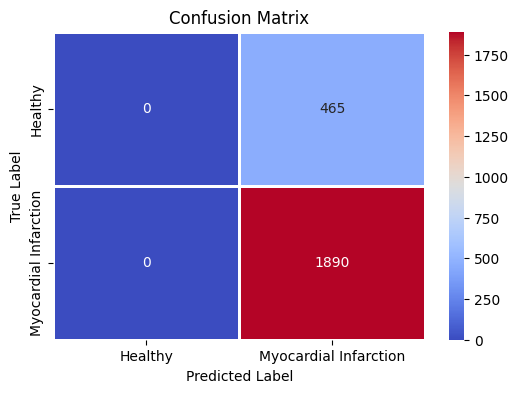

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       465
           1       0.80      1.00      0.89      1890

    accuracy                           0.80      2355
   macro avg       0.40      0.50      0.45      2355
weighted avg       0.64      0.80      0.71      2355



c:\Users\user\Documents\GitHub\INF2008-ECG\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Documents\GitHub\INF2008-ECG\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Documents\GitHub\INF2008-ECG\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [11]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    pyplot.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=le.classes_,
                yticklabels=le.classes_,
                annot=True,
                fmt='d')
    pyplot.title('Confusion Matrix')
    pyplot.ylabel('True Label')
    pyplot.xlabel('Predicted Label')
    pyplot.show()

#X_test = X_test.reshape(X_test.shape[0], input_shape)
    
y_pred_test = model.predict([X_test1, X_test2, X_test3, X_test4, X_test5, X_test6, X_test7, X_test8, X_test9, X_test10, X_test11, X_test12], verbose = 1)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
#max_y_test = np.argmax(Y_test, axis=1)

#X_test = X_test.reshape(X_test.shape[0], input_shape)

show_confusion_matrix(Y_test, max_y_pred_test)

print(classification_report(Y_test, max_y_pred_test))

In [12]:
# Load model
#model = load_model('LSTM_Models/best_model.18-0.19.h5')
model = load_model('Models/best_model.01-0.67.h5')
print('Model loaded')

Model loaded


In [13]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Reshape data for Random Forest (flattening the 2D signal into 1D)
X_rf_train = X_train.reshape(X_train.shape[0], -1)
X_rf_test = X_test.reshape(X_test.shape[0], -1)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_rf_train, Y_train)

# Predictions
Y_pred_rf = rf_classifier.predict(X_rf_test)

# Evaluation
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred_rf))


Random Forest Accuracy: 0.9936
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       465
           1       0.99      1.00      1.00      1890

    accuracy                           0.99      2355
   macro avg       0.99      0.99      0.99      2355
weighted avg       0.99      0.99      0.99      2355

